## DACON 소득 예측 AI 해커톤 (Feat. Forif ML)

### 1. 데이터 확인 및 분석(EDA)

#### 1) 데이터 불러오기

In [3]:
import pandas as pd

# csv 파일로부터 데이터 불러오기
df = pd.read_csv("") # train.csv 경로 작성

In [4]:
# 데이터가 잘 불러와졌는지 확인
df.head()

ID  Age Gender                Education_Status Employment_Status   
0  TRAIN_00000   63      M                    Middle (7-8)         Full-Time  \
1  TRAIN_00001   37      M  Associates degree (Vocational)         Full-Time   
2  TRAIN_00002   58      F                   High graduate         Full-Time   
3  TRAIN_00003   44      M                   High graduate         Full-Time   
4  TRAIN_00004   37      F                   High graduate         Full-Time   

   Working_Week (Yearly)              Industry_Status   
0                      4              Social Services  \
1                     52                Entertainment   
2                     52  Manufacturing (Non-durable)   
3                     52                       Retail   
4                     52                       Retail   

                  Occupation_Status   Race Hispanic_Origin  ... Citizenship   
0                          Services  White       All other  ...      Native  \
1                          Services  White       All other  ...      Native   
2  Admin Support (include Clerical)  Black       All other  ...      Native   
3             Technicians & Support  White       All other  ...      Native   
4                             Sales  White       All other  ...      Native   

  Birth_Country Birth_Country (Father) Birth_Country (Mother)   
0            US                     US                     US  \
1            US                     US                     US   
2            US                     US                     US   
3            US                     US                     US   
4            US                     US                     US   

                                    Tax_Status Gains Losses Dividends   
0                                     Nonfiler     0      0         0  \
1                                       Single     0      0         0   
2  Married Filling Jointly both under 65 (MFJ)  3411      0         0   
3                                       Single     0      0         0   
4                      Head of Household (HOH)     0      0         0   

   Income_Status  Income  
0        Unknown     425  
1   Under Median       0  
2   Under Median     860  
3   Under Median     850  
4        Unknown     570  

[5 rows x 23 columns]

#### 2) 데이터 간단히 분석

In [5]:
# 데이터의 구성 확인
df.shape

(20000, 23)

In [6]:
# 결측치 확인
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [ ]:
# 데이터는 20000개의 행(데이터)과 23개의 열(특징)으로 이루어져 있습니다.
# 결측치는 없는 것으로 확인됩니다.

# 데이터 분석에 앞서, 이산형 변수인지 연속형 변수인지 확인할 필요가 있습니다.
# 연속형 변수의 경우, 상황에 따라 범위를 나누어 이산형 변수로 사용할 수 있습니다.

## ID: 고유 넘버. 사용하지 않을 예정입니다.
## Age: 나이. 연속형 변수입니다.
## Gender: 성별. 이산형 변수입니다.
## Education_Status: 최종 학력. 이산형 변수입니다.
## Employment_Status: 취업 상태. 이산형 변수입니다.
## Working_Week (Yearly): 주당 일하는 시간. 연속형 변수입니다.
## Industry_Status: 산업 분야. 이산형 변수입니다.
## Occupation_Status: 직업 분야. 이산형 변수입니다.
## Race: 인종. 이산형 변수입니다.
## Hispanic_Origin: 히스패닉 출신여부. 이산형 변수입니다.
## Martial_Status: 결혼 여부. 이산형 변수입니다.
## Household_Status: 가족 구성. 이산형 변수입니다.
## Household_summary: 가족 구성 요약. 이산형 변수입니다.
## Citizenship: 시민권 여부. 이산형 변수입니다.
## Birth_Country: 국적. 이산형 변수입니다.
## Birth_Country (Father): 아버지의 국적. 이산형 변수입니다.
## Birth_Country (Mother): 어머니의 국적. 이산형 변수입니다.
## Tax_Status: 세금 종류. 이산형 변수입니다.
## Gains: 소득 금액. 연속형 변수입니다.
## Losses: 손실 금액. 연속형 변수입니다.
## Dividends: 배당 금액. 연속형 변수입니다.
## Income_Status: 총 소득. 연속형 변수입니다.
## Income: 1시간당 소득. 연속형 변수입니다.

# 다수의 이산형 변수가 보입니다. 이를 전처리하는 과정에 시간을 많이 쏟아야할 것 같습니다.
# 두 종류의 데이터를 잘 분석하기 위해 일단 변수 종류에 따라 분류해줍시다.

In [7]:
# 연속형 변수 추출
df_int = df[df.describe().columns]

# 이산형 변수 추출
df_str = df[df.columns.difference(df.describe().columns)]

#### 3) 시각화를 통한 분포 및 상관관계 확인

In [11]:
# 시각화를 위한 라이브러리 불러오기
import matplotlib.pyplot as plt

- 연속형 변수 분석

In [8]:
# 연속형 변수의 통계 정보 확인
df_int.describe()

Age  Working_Week (Yearly)         Gains        Losses   
count  20000.000000           20000.000000  20000.000000  20000.000000  \
mean      35.632500              34.943050    383.129500     40.202150   
std       17.994414              22.254592   4144.247487    279.182677   
min        0.000000               0.000000      0.000000      0.000000   
25%       23.000000               7.000000      0.000000      0.000000   
50%       34.000000              52.000000      0.000000      0.000000   
75%       47.000000              52.000000      0.000000      0.000000   
max       90.000000              52.000000  99999.000000   4356.000000   

          Dividends        Income  
count  20000.000000  20000.000000  
mean     123.451450    554.565250  
std     1206.949429    701.553155  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000    500.000000  
75%        0.000000    875.000000  
max    45000.000000   9999.000000

In [ ]:
# 통계정보를 볼 때, 몇 개의 특징들은 평균과 중앙값이 크게 차이가 납니다.
# 이는 데이터의 분포가 일반적인 상황과 다를 수도 있다는 것을 암시하는데요, 이를 시각화로 확인해봅시다.

\- Age

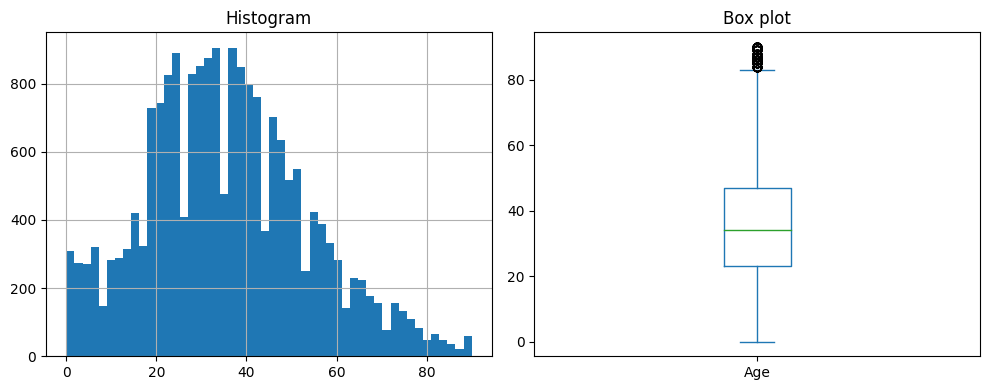

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Age'].hist(bins = 50, ax=axes[0])
axes[0].set_title('Histogram')

df_int['Age'].plot(kind = 'box', ax=axes[1])
axes[1].set_title('Box plot')

plt.tight_layout()

# 시각화
plt.show()

In [ ]:
# 평균과 중앙값이 비슷한 정규분포의 모습을 띄고 있습니다.
# 크게 이상치가 존재하지 않는 것을 확인할 수 있습니다.
# 특이한 점이 보이지는 않습니다.

\- Working_Week (Yearly)

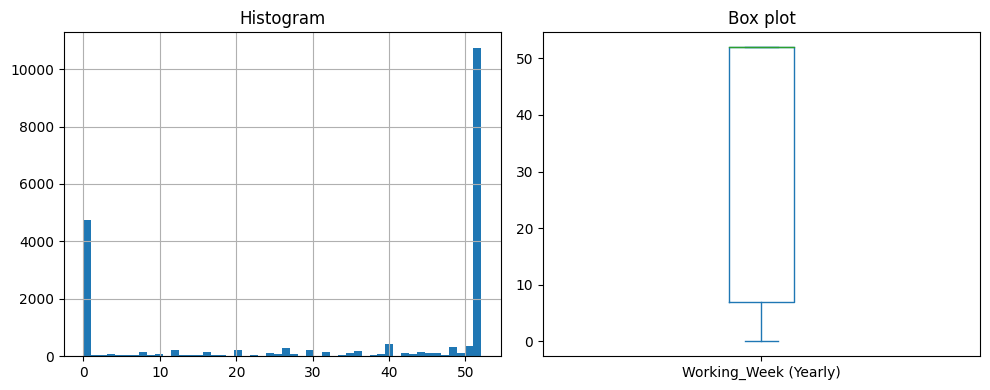

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Working_Week (Yearly)'].hist(bins = 50, ax=axes[0])
axes[0].set_title('Histogram')

df_int['Working_Week (Yearly)'].plot(kind = 'box', ax=axes[1])
axes[1].set_title('Box plot')

plt.tight_layout()

# 시각화
plt.show()

In [ ]:
# 데이터의 분포가 양극단에 몰려있는 것을 확인할 수 있습니다.
# 위의 통계 요약에서 확인할 수 있듯이, 최댓값과 중앙값이 동일합니다.
## 이는 평균값이나 중앙값이 중요한 정보를 가지고 있지 않음을 뜻합니다.
# 이상치는 확인되지 않습니다.
# 차후 데이터 분포를 전처리할 필요성이 있을 것 같으며, 범위를 나누어 이산형 변수로 처리해도 좋을 것 같습니다.

\- Gains

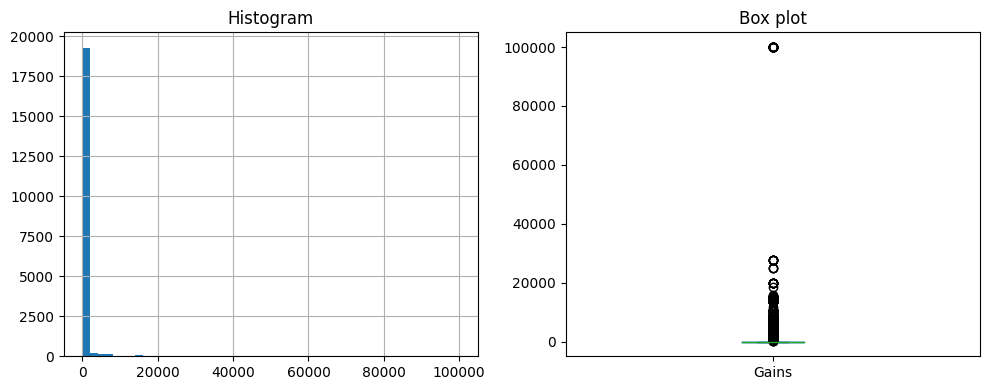

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Gains'].hist(bins = 50, ax=axes[0])
axes[0].set_title('Histogram')

df_int['Gains'].plot(kind = 'box', ax=axes[1])
axes[1].set_title('Box plot')

plt.tight_layout()

# 시각화
plt.show()

In [ ]:
# 왼쪽에 극단적으로 몰려있는 분포를 확인할 수 있습니다. 이는 경제 관련 데이터에서 드물지 않게 볼 수 있습니다.
## 이러한 데이터는 모델에 학습하기 전에 특수한 전처리를 해줄 필요성이 있습니다.
# box plot에서 이상치가 존재하는 것을 확인할 수 있습니다. 처리해줄 필요가 있습니다.

\- Losses

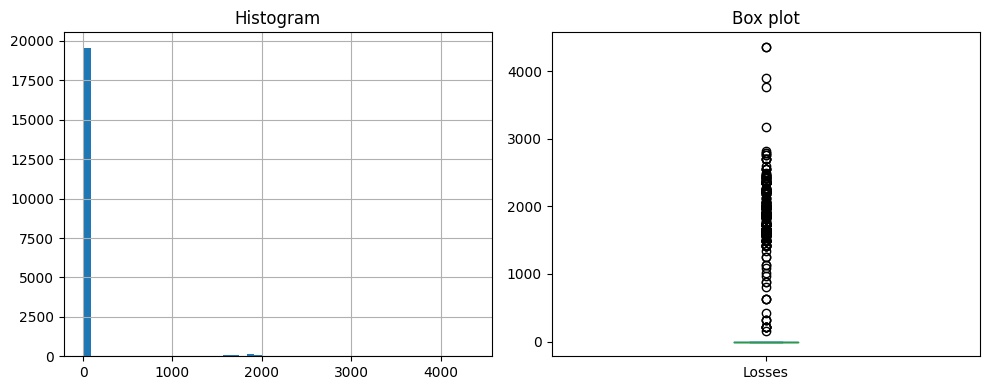

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Losses'].hist(bins = 50, ax=axes[0])
axes[0].set_title('Histogram')

df_int['Losses'].plot(kind = 'box', ax=axes[1])
axes[1].set_title('Box plot')

plt.tight_layout()

# 시각화
plt.show()

In [ ]:
# 마찬가지로 극단적인 분포를 확인할 수 있습니다.
# 이상치 또한 다수 확인할 수 있지만, 삭제를 해주어야하는 것인지에 대해서는 더 고려해봐야겠습니다.
# Gains와의 상관관계를 확인해볼 필요가 있겠습니다.

\- Income

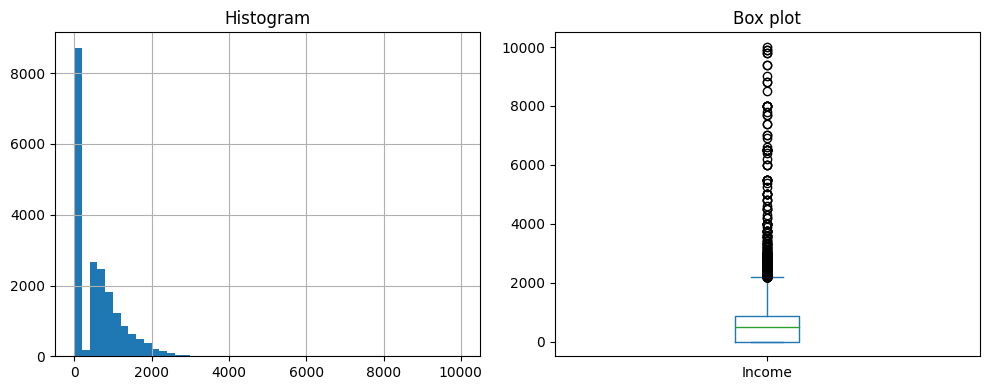

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_int['Income'].hist(bins = 50, ax=axes[0])
axes[0].set_title('Histogram')

df_int['Income'].plot(kind = 'box', ax=axes[1])
axes[1].set_title('Box plot')

plt.tight_layout()

# 시각화
plt.show()

In [ ]:
# 이 또한 금융에 대한 정보이기에 분포가 왼쪽에 몰려있습니다.
# 분포가 0에 몰려있기 떄문에 발생하는 이상치에 대해서 어떻게 처리해야할지 고민해봐야할 필요성이 있습니다.

- 분포가 양극단에 몰린 변수들은 log를 취해 분포를 바꾸거나 범주형 데이터로 바꾸어 살펴보는 방법이 있습니다.

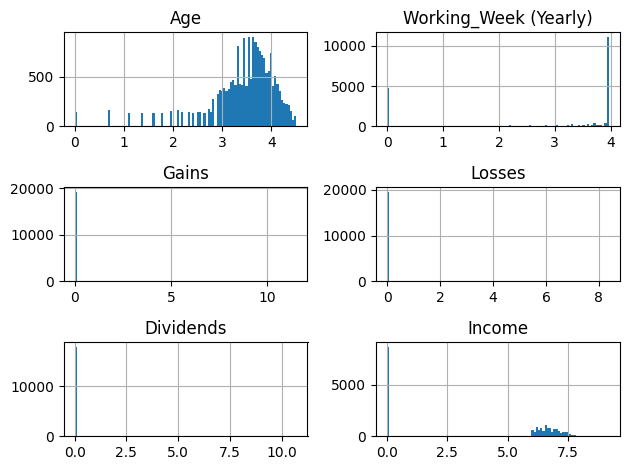

In [24]:
import numpy as np

np.log(df_int+1).hist(bins=100)

plt.tight_layout()

plt.show()

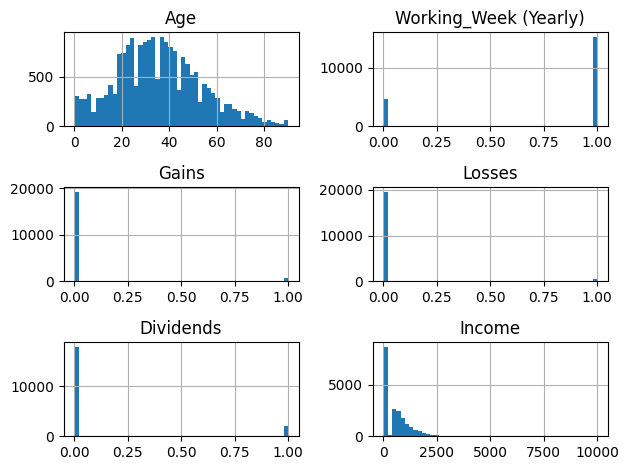

In [27]:
# 로그 형태로 바꾸어도 유의미한 분포의 변화를 확인할 수 없습니다.
# 이번에는 범주형 데이터로 바꿔보겠습니다.

zeroone= [df_int.iloc[:,i].apply(lambda x: 0 if x == 0 else 1) for i in range(1,5)]
df_zeroone= pd.DataFrame(zeroone).T
df_int_zeroone= pd.concat([df_int.iloc[:,[0]],df_zeroone,df_int.iloc[:,[-1]]],axis=1)
df_int_zeroone.hist(bins=50);
plt.tight_layout()

plt.show()

In [ ]:
# 왼쪽으로 몰려있던 데이터가 두개의 범주로 나뉘어진 것을 확인 할 수 있습니다.
# 이렇게 되면 모델이 처리해야하는 경우가 줄어 계산량 면에서 장점이 있습니다.
# 다만 이렇게 해서 잃는 정보도 있으니 주의해야할것입니다.

- 각 데이터 간 상관관계 확인

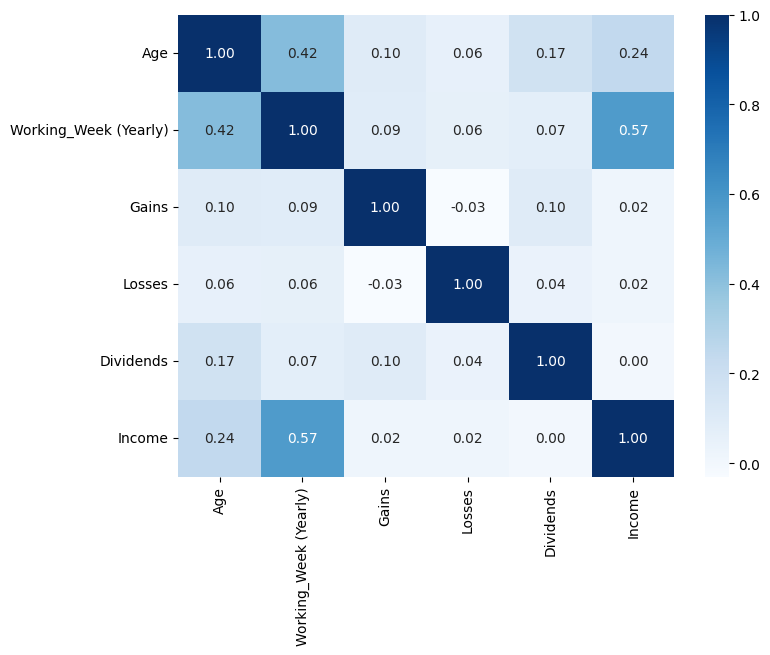

In [29]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(np.log(df_int+1).corr(), annot=True, cmap='Blues', fmt=".2f")
plt.show()

In [ ]:
# 나이와 일하는 시간, 소득이 상관관계가 높습니다. 아무래도 청소년은 일을 하지 않으니 당연한 일이기도 합니다.
# 일하는 시간과 소득 또한 상관관계가 높습니다. 당연한 이야기입니다.
# 나머지는 크게 상관관계를 확인할 수 없습니다.

- 회귀분석

In [30]:
# 히트맵은 상관관계를 잘 보여주기도 하지만, 그것이 정말 유의미한지는 회귀분석을 통해 진행합니다.
# 회귀분석에 대해 궁금하신 분들은 단톡방이나 개인적으로 카톡 남겨 주시면 설명드리겠습니다.

In [ ]:
# 이후에 남은 과정은 이산형 변수를 숫자로 바꾸어주는 전처리를 진행하고, 모델을 돌려 성능을 확인하는 것입니다.
# 위와 같은 과정을 진행하는 이유는 단순히 모델 성능을 좋게 하려는 이유도 있지만 클라이언트에게 어떤 과정을 거쳐 이런 결론에 도달했는지 설득하기 위함도 있습니다.
# 머신러닝은 사람이 데이터를 살피는 만큼 딥러닝에서 하는 것보다 더 신중하게 분석할 필요성이 있다는 것을 알고, 나중에 데이터를 분석하신다면 위와 같은 과정을 꼭 진행하시길 바랍니다.